In [1]:
import os
from os.path import join, dirname

PATH_REPO = dirname(dirname(os.getcwd()))
PATH_DATA = join(PATH_REPO, "data", "mental-health")
PATH_UTILS = join(PATH_REPO, "src")

import sys

sys.path.append(PATH_REPO)

In [2]:
import pandas as pd

csv_name = "sri-lanka.csv"
df = pd.read_csv(join(PATH_DATA, csv_name))
df.head()

,id,text,localtime,source,institution,image,complaint,question,keywords,lang,country_code,sentiment,age
0,43d1e63750efee45b2d3d067fefb95b5,The fanart and tributes and everything are all...,2023-10-15 05:39:44+00:00,twitter,False,NaN,False,False,"['fanart', 'tributes', 'wonderful', 'celebrate...",en,LK,positive,>34
1,2f36cc7436bc98ccaebc5ce4ffe7e1bd,guys don’t watch the bear it will (seriously) ...,2023-10-15 05:55:38+00:00,twitter,False,NaN,False,False,"['guys', 'watch', 'bear', 'mental', 'illness',...",en,LK,negative,<21
2,174874a8ec3834539e5cfb5b0a84391b,@xuvhao don’t watch save me if you value your ...,2023-10-15 05:58:39+00:00,twitter,True,NaN,False,False,"['watch', 'save', 'mental', 'health']",en,LK,negative,<21
3,a686870b2ff8176bad40fab8b45560d0,tertinggal lecture note im going to kill myself,2023-10-15 06:13:35+00:00,twitter,True,NaN,False,False,"['tertinggal', 'lecture', 'note', 'kill']",en,LK,negative,21-34
4,73b6122b1ce5bb2b247f89dc47917744,Spaces are so fun but also not super compatibl...,2023-10-15 06:15:25+00:00,twitter,False,NaN,False,False,"['spaces', 'fun', 'super', 'compatible', 'anxi...",en,LK,negative,<21


In [3]:
df["date"] = df["localtime"].apply(lambda x: x[:10])
df.head()

,id,text,localtime,source,institution,image,complaint,question,keywords,lang,country_code,sentiment,age,date
0,43d1e63750efee45b2d3d067fefb95b5,The fanart and tributes and everything are all...,2023-10-15 05:39:44+00:00,twitter,False,NaN,False,False,"['fanart', 'tributes', 'wonderful', 'celebrate...",en,LK,positive,>34,2023-10-15
1,2f36cc7436bc98ccaebc5ce4ffe7e1bd,guys don’t watch the bear it will (seriously) ...,2023-10-15 05:55:38+00:00,twitter,False,NaN,False,False,"['guys', 'watch', 'bear', 'mental', 'illness',...",en,LK,negative,<21,2023-10-15
2,174874a8ec3834539e5cfb5b0a84391b,@xuvhao don’t watch save me if you value your ...,2023-10-15 05:58:39+00:00,twitter,True,NaN,False,False,"['watch', 'save', 'mental', 'health']",en,LK,negative,<21,2023-10-15
3,a686870b2ff8176bad40fab8b45560d0,tertinggal lecture note im going to kill myself,2023-10-15 06:13:35+00:00,twitter,True,NaN,False,False,"['tertinggal', 'lecture', 'note', 'kill']",en,LK,negative,21-34,2023-10-15
4,73b6122b1ce5bb2b247f89dc47917744,Spaces are so fun but also not super compatibl...,2023-10-15 06:15:25+00:00,twitter,False,NaN,False,False,"['spaces', 'fun', 'super', 'compatible', 'anxi...",en,LK,negative,<21,2023-10-15


In [4]:
df["date"].value_counts()

2023-12-27    1358
2023-12-29    1273
2023-12-19    1240
2023-12-31    1192
2023-12-18    1189
              ... 
2023-10-28     613
2023-10-29     611
2023-10-30     576
2023-10-15     393
2023-12-22     364
Name: date, Length: 79, dtype: int64

In [5]:
from alerts.preprocess import data2timeSeries

freq_per_day_df = data2timeSeries(df)
freq_per_day_df.head(20)

,id,text,localtime,source,institution,image,complaint,question,keywords,lang,country_code,sentiment,age
date,,,,,,,,,,,,,
2023-10-15,393,393,393,393,393,28,393,393,393,393,393,393,393
2023-10-16,617,617,617,617,617,42,617,617,617,617,617,617,617
2023-10-17,660,660,660,660,660,44,660,660,660,660,660,660,660
2023-10-18,670,670,670,670,670,39,670,670,670,670,670,670,670
2023-10-19,675,675,675,675,675,49,675,675,675,675,675,675,675
2023-10-20,633,633,633,633,633,42,633,633,633,633,633,633,633
2023-10-21,715,715,715,715,715,50,715,715,715,715,715,715,715
2023-10-22,782,782,782,782,782,52,782,782,782,782,782,782,782
2023-10-23,771,771,771,771,771,53,771,771,771,771,771,771,771


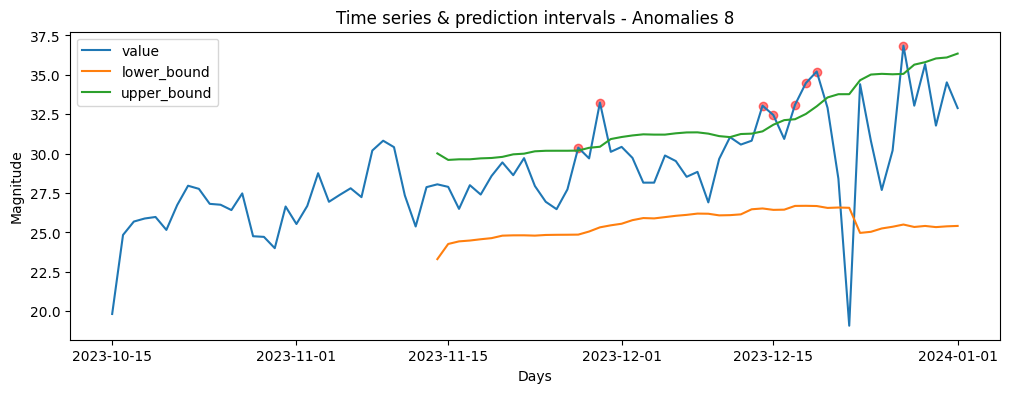

In [6]:
from alerts.time_series import AnomalyMeanTS
from alerts.plot import plot
from alerts.dataclasses import TimeSeries

dates, values = freq_per_day_df.index.values, freq_per_day_df.text.values
time_series = TimeSeries(dates, values)


ts = AnomalyMeanTS(time_series, flat_ts=True)
plot(ts, show_anomalies=True)

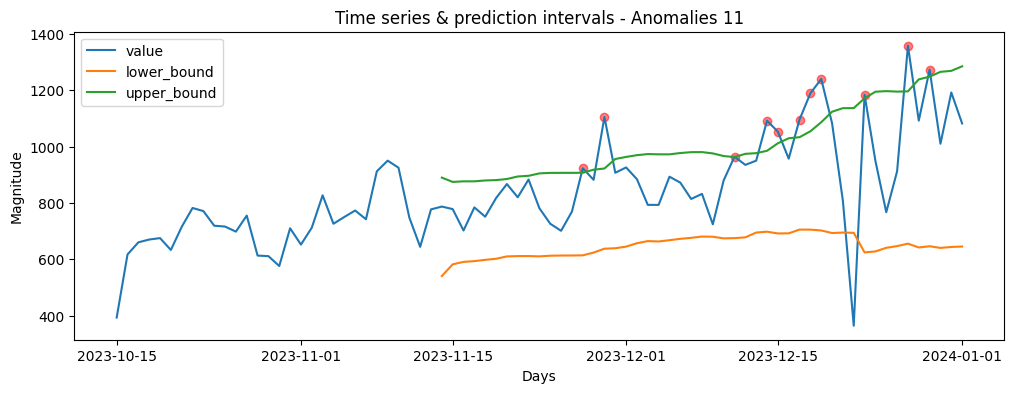

In [8]:
from alerts.time_series import AnomalyMeanTS
from alerts.plot import plot
from alerts.dataclasses import TimeSeries

dates, values = freq_per_day_df.index.values, freq_per_day_df.text.values
time_series = TimeSeries(dates, values)


ts = AnomalyMeanTS(time_series, flat_ts=False)
plot(ts, show_anomalies=True)